In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import PIL
import pathlib

from PIL import Image
from sklearn.model_selection import train_test_split  
from tensorflow import keras as tfkeras
from tensorflow.keras import datasets, layers, models, callbacks
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator

In [21]:
# Variables
data_path = '/kaggle/input/gender-classification-dataset/Training/'
data_dir = pathlib.Path(data_path)

width=200
height=200

# female = list(data_dir.glob('man/*'))
# male = list(data_dir.glob('woman/*'))


# gender_image_dict = {
#     'male': male,
#     'female': female
# }

gender_labels_dict = {
    'male': 0,
    'female': 1
}

x = []
y = []

print(data_dir)

/kaggle/input/gender-classification-dataset/Training


In [22]:
# Data
# for gender, images in gender_image_dict.items():
#     print(gender)
#     for image in images:
#         img = cv2.imread(str(image))
#         if isinstance(img,type(None)): 
#             continue
            
#         elif ((img.shape[0] >= height) and  (img.shape[1] >=width)):
#             resized_img = cv2.resize(img,(width,height))
#             x.append(resized_img)
#             y.append(gender_labels_dict[gender])
#         else:
#             continue
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(height, width),
  batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(height, width),
  batch_size=batch_size
) 


Found 47009 files belonging to 2 classes.
Using 37608 files for training.
Found 47009 files belonging to 2 classes.
Using 9401 files for validation.


In [17]:
# Convert to array, split data
# x = np.array(x)
# y = np.array(y)

# print(x.shape)
# print(y.shape)

# x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.1)

# print(len(x_train),len(y_train))
# print(len(x_test),len(y_test))

# print(x_train.shape,y_train.shape)
# print(x_test.shape,y_test.shape)

In [23]:
# Model
channels = 3

image_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, (3,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
]) 

image_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# image_model.summary()

In [24]:
# Training
earlystop = tfkeras.callbacks.EarlyStopping(
    patience=5,
    verbose=1
)

history = image_model.fit(
    train_ds, 
    validation_data=val_ds,
    epochs=30,
    callbacks=[earlystop]
)

Epoch 1/30


2024-02-08 07:53:53.235356: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_7/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1176/1176 [==============================] - 77s 62ms/step - loss: 0.8957 - accuracy: 0.8466 - val_loss: 0.3222 - val_accuracy: 0.8759
Epoch 2/30
1176/1176 [==============================] - 68s 58ms/step - loss: 0.3211 - accuracy: 0.8827 - val_loss: 0.2545 - val_accuracy: 0.9118
Epoch 3/30
1176/1176 [==============================] - 68s 58ms/step - loss: 0.2823 - accuracy: 0.8949 - val_loss: 0.2948 - val_accuracy: 0.9049
Epoch 4/30
1176/1176 [==============================] - 67s 57ms/step - loss: 0.2553 - accuracy: 0.9022 - val_loss: 0.2895 - val_accuracy: 0.8987
Epoch 5/30
1176/1176 [==============================] - 67s 57ms/step - loss: 0.2561 - accuracy: 0.9017 - val_loss: 0.2416 - val_accuracy: 0.9223
Epoch 6/30
1176/1176 [==============================] - 67s 57ms/step - loss: 0.2318 - accuracy: 0.9077 - val_loss: 0.2895 - val_accuracy: 0.9010
Epoch 7/30
1176/1176 [==============================] - 68s 57ms/step - loss: 0.2242 - accuracy: 0.9115 - val_loss: 0.2361 - val_accura

In [36]:
test_acc = image_model.evaluate(val_ds)

print(f'Loss: {test_acc[0]}')
print(f'Accuracy: {100*(test_acc[1])}%')

294/294 [==============================] - 5s 16ms/step - loss: 0.2206 - accuracy: 0.9260
Loss: 0.22057698667049408
Accuracy: 92.59653091430664%


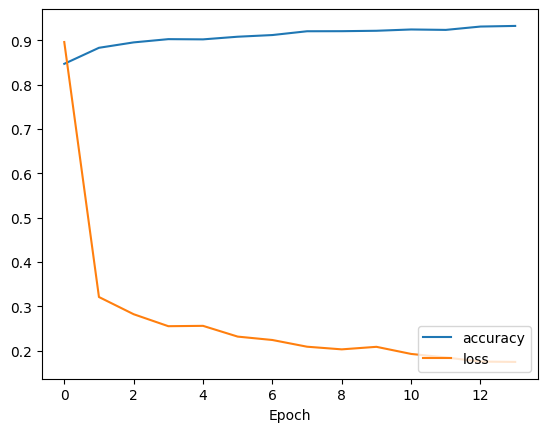

In [37]:
# Loss vs Accuracy plot

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


In [49]:
# image_model.save('gender_image_classifier.h5')
import os
image_model.save(os.path.join('models','gender_image_classifier1.h5'))

# os.path

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


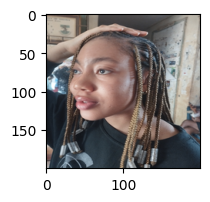

In [47]:


classes = ["male","female"]
img_path = "/kaggle/input/testing-images/julie.jpg"
fileImage = Image.open(img_path).convert("RGB").resize([width,height],Image.LANCZOS)
image = np.array(fileImage)
myimage = image.reshape(1, width,height,3)

# prepare pixel data
myimage = myimage.astype('float32')
myimage = myimage/255.

plt.figure(figsize = (4,2))
plt.imshow(image)





In [48]:
pred_arr = image_model.predict(myimage)

pred_class = pred_arr.argmax()
probability = pred_arr.max()

print(pred_class)
print(probability)

1/1 [==============================] - 0s 20ms/step
1
0.90389895
